# <center> Deep Learning Day 1: The Basics </center>

# <a id="Learning-Objectives">Learning Objectives</a>

By the end of this lecture, you will:
* Understand the basics of pyTorch.
* Understand the basics of machine learning.
* Understand the basics of deep learning
* Perform exploratory data analysis on Abeta-stained 5XFAD mice brain images.
<br>

## <font color="green"> Table of Contents </font>

- ### [Gradient Descent](#Gradient-Descent)
- ### [Layers of a Neural Network](#Layers-of-a-Neural-Network)
- ### [Torch Basics](#Torch-Basics)
- ### [Regression Using PyTorch](#Regression-Using-PyTorch)
- ### [Using the nn class](#Using-the-nn-class)
- ### [Logistic Regression](#Logistic-Regression)
- ### [Our First Neural Network](#Our-First-Neural-Network)
- ### [Exploratory Analysis of our dataset](#Exploratory-Analysis-of-our-dataset)

# Introduction

<b>Artificial intelligence (AI)</b> is any technique that tries to mimic human intelligence.
Machine Learning and Deep Learning are subsets of AI. Applications include:
- Self Driving Cars
- Language Translation
- Cell segmentation

image source:https://miro.medium.com/v2/resize:fit:1100/format:webp/1*-oVnNlSFTUxvpJ42VIVpRw.jpeg

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*-oVnNlSFTUxvpJ42VIVpRw.jpeg" width=600></img>

#### What is Machine Learning

<b>Machine Learning is a set of statistical and algorithmic techniques that learn associations, relationships, and patterns within data.</b>


<b>Machine Learning is broadly divided into two main categories</b>:

1) <b>Supervised learning</b>, where we work with <b>labeled data</b> (e.g. AD or control with their associated specific pathological image features).
Common Tasks:

    - Classification: Predicting discrete categories. Labels can be binary (young vs old), or multi-class (young, old and middle-aged)
    - Regression: Predicting continuous data such as Height, stock price, etc.

Image Source: https://www.dataiku.com/wp-content/uploads/2024/09/classification-1024x488.png

<img src="https://www.dataiku.com/wp-content/uploads/2024/09/classification-1024x488.png"></img>


2) <b>Unsupervised learning</b>, where we use <b>unlabeled</b> data to discover hidden patterns or groups.
   
<b>Example of unsupervised learning: </b> Clustering.   

    - Principal Component Analysis (used in gene expression analysis to visualize samples by condition)
    -  UMAP  (Common in single-cell analysis to cluster by cell type)
<b> Another example of unsupervised learning </b>: Dimensionality Reduction. E.g.  PCA  can be used to reduce dimensions.

Image Source:https://www.researchgate.net/profile/Marc-Andre-Schulz/publication/348799211/figure/fig1/AS:1078538077777920@1634154924103/Examples-of-supervised-and-unsupervised-machine-learning-In-supervised-machine-learning.ppm

<img src="https://www.researchgate.net/profile/Marc-Andre-Schulz/publication/348799211/figure/fig1/AS:1078538077777920@1634154924103/Examples-of-supervised-and-unsupervised-machine-learning-In-supervised-machine-learning.ppm"></img>



3) <b> Self-Supervised Learning and Semi-Supervised Learning (emerging approaches)</b>

    - These approaches can learn from partially labeled data or even unlabeled data.
    
    - Autoregressive models (such as LLM) learn to predict the next word in a sentence using unlabeled data.
    
    - The data itself provides supervision.
- Many of these machine learning tasks are already used in everyday tasks.

<b>Data can be broadly classified as either structured or unstructured.</b>
<b> Structured data</b> refers to data that is organized in a tabular format, making it easy to save in a spreadsheet (e.g. Excel)

    - Example: gene expression matrix.
    - In a gene expression matrix, rows represent genes, and columns representing samples.
    - Such data can easily be imported into R or Python as data frames.
<b> Unstructured data </b> refers to data that does not fit neatly into data frames or tables <br>

 Examples:<br>

    - Images (data consisting of pixels).
    - Text, including sentences and human languages.
    - Audio data from radio, for example.
    - Nanopore signal data.

#### What is Deep Learning?

Deep Learning is considered a <b>subset of  machine learning</b> that typically uses <b>unstructured data</b> as input.  Deep learning uses <b>artificial neural networks</b>, which are complex models, <b>originally structured on the human brain to recognize patterns</b> from this type of unstructured data. Typical tasks are:

* <b> Classification </b> (e.g. Alzheimer's vs Control)
* <b> Segmentation </b> (e.g. Finding cell boundaries)


Some examples of systems that use neural networks are <b>SIRI, Alexa, and large language models (LLMs) such as ChatGPT</b>.  Models such as ChatGPT use other mechanisms such as the so-called "Attention" mechanisms to capture long-distant relationships.

In the context of biomedical images/biomedical sciences, deep learning has gained prominence in tasks such as:

* <b> Diagnosing </b> diseases </b> from X-ray images
* <b> Understanding </b> clinical texts or journal articles
* <b> Defining </b> cell boundaries </b> (i.e. cell segmentation)


#### Brief History of Deep Learning

Many data scientists/computer scientists have contributed to the development of deep learning as we know it today.

- In the <b>1960s/1970s</b>, the <b>backpropagation</b> algorithm (which is a way to calculate the gradients and update the weights) was introduced.
-  In 1989, the first <b>application</b> of backpropagation for digit recognition using convolutional neural networks (CNN) was used by Yann LeCun, who currently works at Meta.
-  In 2009, ImageNet, a large-scale, curated image dataset was launched by Fei-Fei Li.
-  In 2010s, GPUs took off.  <b>AlexNet</b> was created in 2011 by Jeffrey Hinton's group.  Various architectures such as <b>ResNet</b> were created.
-  2017-The landmark paper, <b>Attention is All You need</b> paper was published. This resulted in various models such as <b>BERT and GPT</b>, etc.
-  2023:  <b>GPT-4</b> released.
-  2024: <b>Nobel prize in Physics</b> awarded to <b>Jeff Hinton</b>.  The developers of <b>Alphafold</b>, a protein structure prediction tool based on deep learning won <b>nobel prize in Chemistry</b>.

More details can be found in the link below:<br>
https://www.dataversity.net/brief-history-deep-learning/

# <a id="Gradient-Descent">Gradient Descent</a>

Typically speaking, machine learning is based on computing parameters that allow you to predict labels/values based on your features.
These parameters can be initialized using random values.
Given random initialization, your initial model is not going to be very accurate.

In simple terms, Gradient Descent is a way to <b>update the weights</b>.  We will use linear regression to demonstrate how gradient descent works.
In a simple linear regression, the slope and the intercept are parameters that are learnable, and gradient descent can be used.<br>

image source:https://science.clemson.edu/physics/labs/tutorials/excel/lrplot.gif

<img src="https://science.clemson.edu/physics/labs/tutorials/excel/lrplot.gif"></img>
<br><br>

In machine learning, these values are called `theta`(which are your parameters or weights) and `bias`.  
Given the features, how do we "predict" `y`?
One way is by using gradient descent. While it is not as accurate as the closed-form solution for regression, it comes close.<br>

image source: https://insightfultscript.com/collections/programming/machine-learning/sgd/sgd.webp

<img src="https://insightfultscript.com/collections/programming/machine-learning/sgd/sgd.webp" width=400 height=250></img>

image source:https://media.geeksforgeeks.org/wp-content/uploads/20240403020401/Screenshot-2024-04-03-020333.png

The goal is to minimize the difference between the actual vs the predicted values by using a Loss function (such as Mean Squared Error loss).


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240403020401/Screenshot-2024-04-03-020333.png"></img>

   We will create some data using a helper function.
This takes as input the starting value, ending value, and the number of values.
This synthetic data creates features for training (X), as well as labels (y). In this case, `y` is continuous, so we are dealing with regression.  These labels are created using the formula $mx+b$, where `m` is the slope and `b` is the intercept.

In [1]:
def create_data(start,stop,ct,m,b):
    X= np.linspace(start,stop,ct)
    y=X*m+b
    return(X,y)

This function below runs gradient descent. The steps are:
- First, you randomly initialize `theta`. The bias can start at 0 (but you can randomize)
    - Using the initial parameter values, we **predict**  $\hat{y}$. The prediction is computed as $\hat{y}^{(i)} = \theta^T X^{(i)} + b$.
    - This prediction will initially be inaccurate.
    - Compare your prediction to the actual value using a loss function.  The lower the loss, the better the model fits the data.
    - Here, we will use the **Mean Square Error Loss** given by:
       $$
      Loss=\frac{1}{2m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2
      $$

Where $m$ is the number of training examples, the $\hat{y}$ is the prediction, and $y$  the actual value.

- Compute the gradient (partial derivative).
    -  For weights: $$\frac{dL}{d\theta}=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})X^{(i)}$$
    - For bias: $$\frac{dL}{db}=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})$$

- Update the parameters:
    - Weights: $$\theta=\theta-\alpha\cdot\frac{dL}{d\theta}$$
    - Bias: $$b=b-\alpha\cdot\frac{dL}{db}$$

Where $\alpha$ is the **learning rate**.

This function estimates the weight and bias terms.
After every epoc/save_epoch epoch iteration, the current theta and bias values are saved for inspection and visualization.

 Parameters:

        X (np.ndarray): Input features, shape (m,)
        y (np.ndarray): Target values, shape (m,)
        alpha (float): Learning rate
        epoch (int): Total number of training iterations (default: 10000)
        save_epoch (int): Number of checkpoints to save during training (default: 20)

    Returns:
        tuple: Final theta, final bias, list of saved thetas, list of saved biases

In [2]:
import numpy as np
def run_model(X,y,alpha,epoch=10000,save_epoch=20):
    theta_list=[]
    bias_list=[]
    save_val=epoch//save_epoch
    np.random.seed(50)
    theta=np.random.random()
    bias=0
    m=len(X)
    for i in range(epoch):
        y_hat=theta*X+bias
        error=y_hat-y
        dj_dtheta=(1/m)*np.dot(X,error)
        dj_db=(1/m)*np.sum(error)
        theta=theta-alpha*dj_dtheta
        bias=bias-alpha*dj_db
        if i%save_val==0:
            theta_list.append(theta)
            bias_list.append(bias)
    return(theta,bias,theta_list,bias_list)

Now, let's create some data. <br>
Here, values range from 1 to 10 with 20 observations in total.

I have set the `theta` or `m` to be equal to 2.75 and `bias` or `intercept` to be equal to 3.

In [3]:
X,y=create_data(1,10,20,2.75,3)
print(X,y)

[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ] [ 5.75        7.05263158  8.35526316  9.65789474 10.96052632 12.26315789
 13.56578947 14.86842105 16.17105263 17.47368421 18.77631579 20.07894737
 21.38157895 22.68421053 23.98684211 25.28947368 26.59210526 27.89473684
 29.19736842 30.5       ]


With a learning rate of 0.01 and 3000 epochs, this algorithm converges to the correct value of `theta` and `b`.

In [4]:
theta,bias,theta_list,bias_list=run_model(X,y,0.01,epoch=1500)

In [5]:
print(theta,bias)

2.770906104588054 2.8573944009875683


The following function shows plot of the predicted line as we update the parameters.

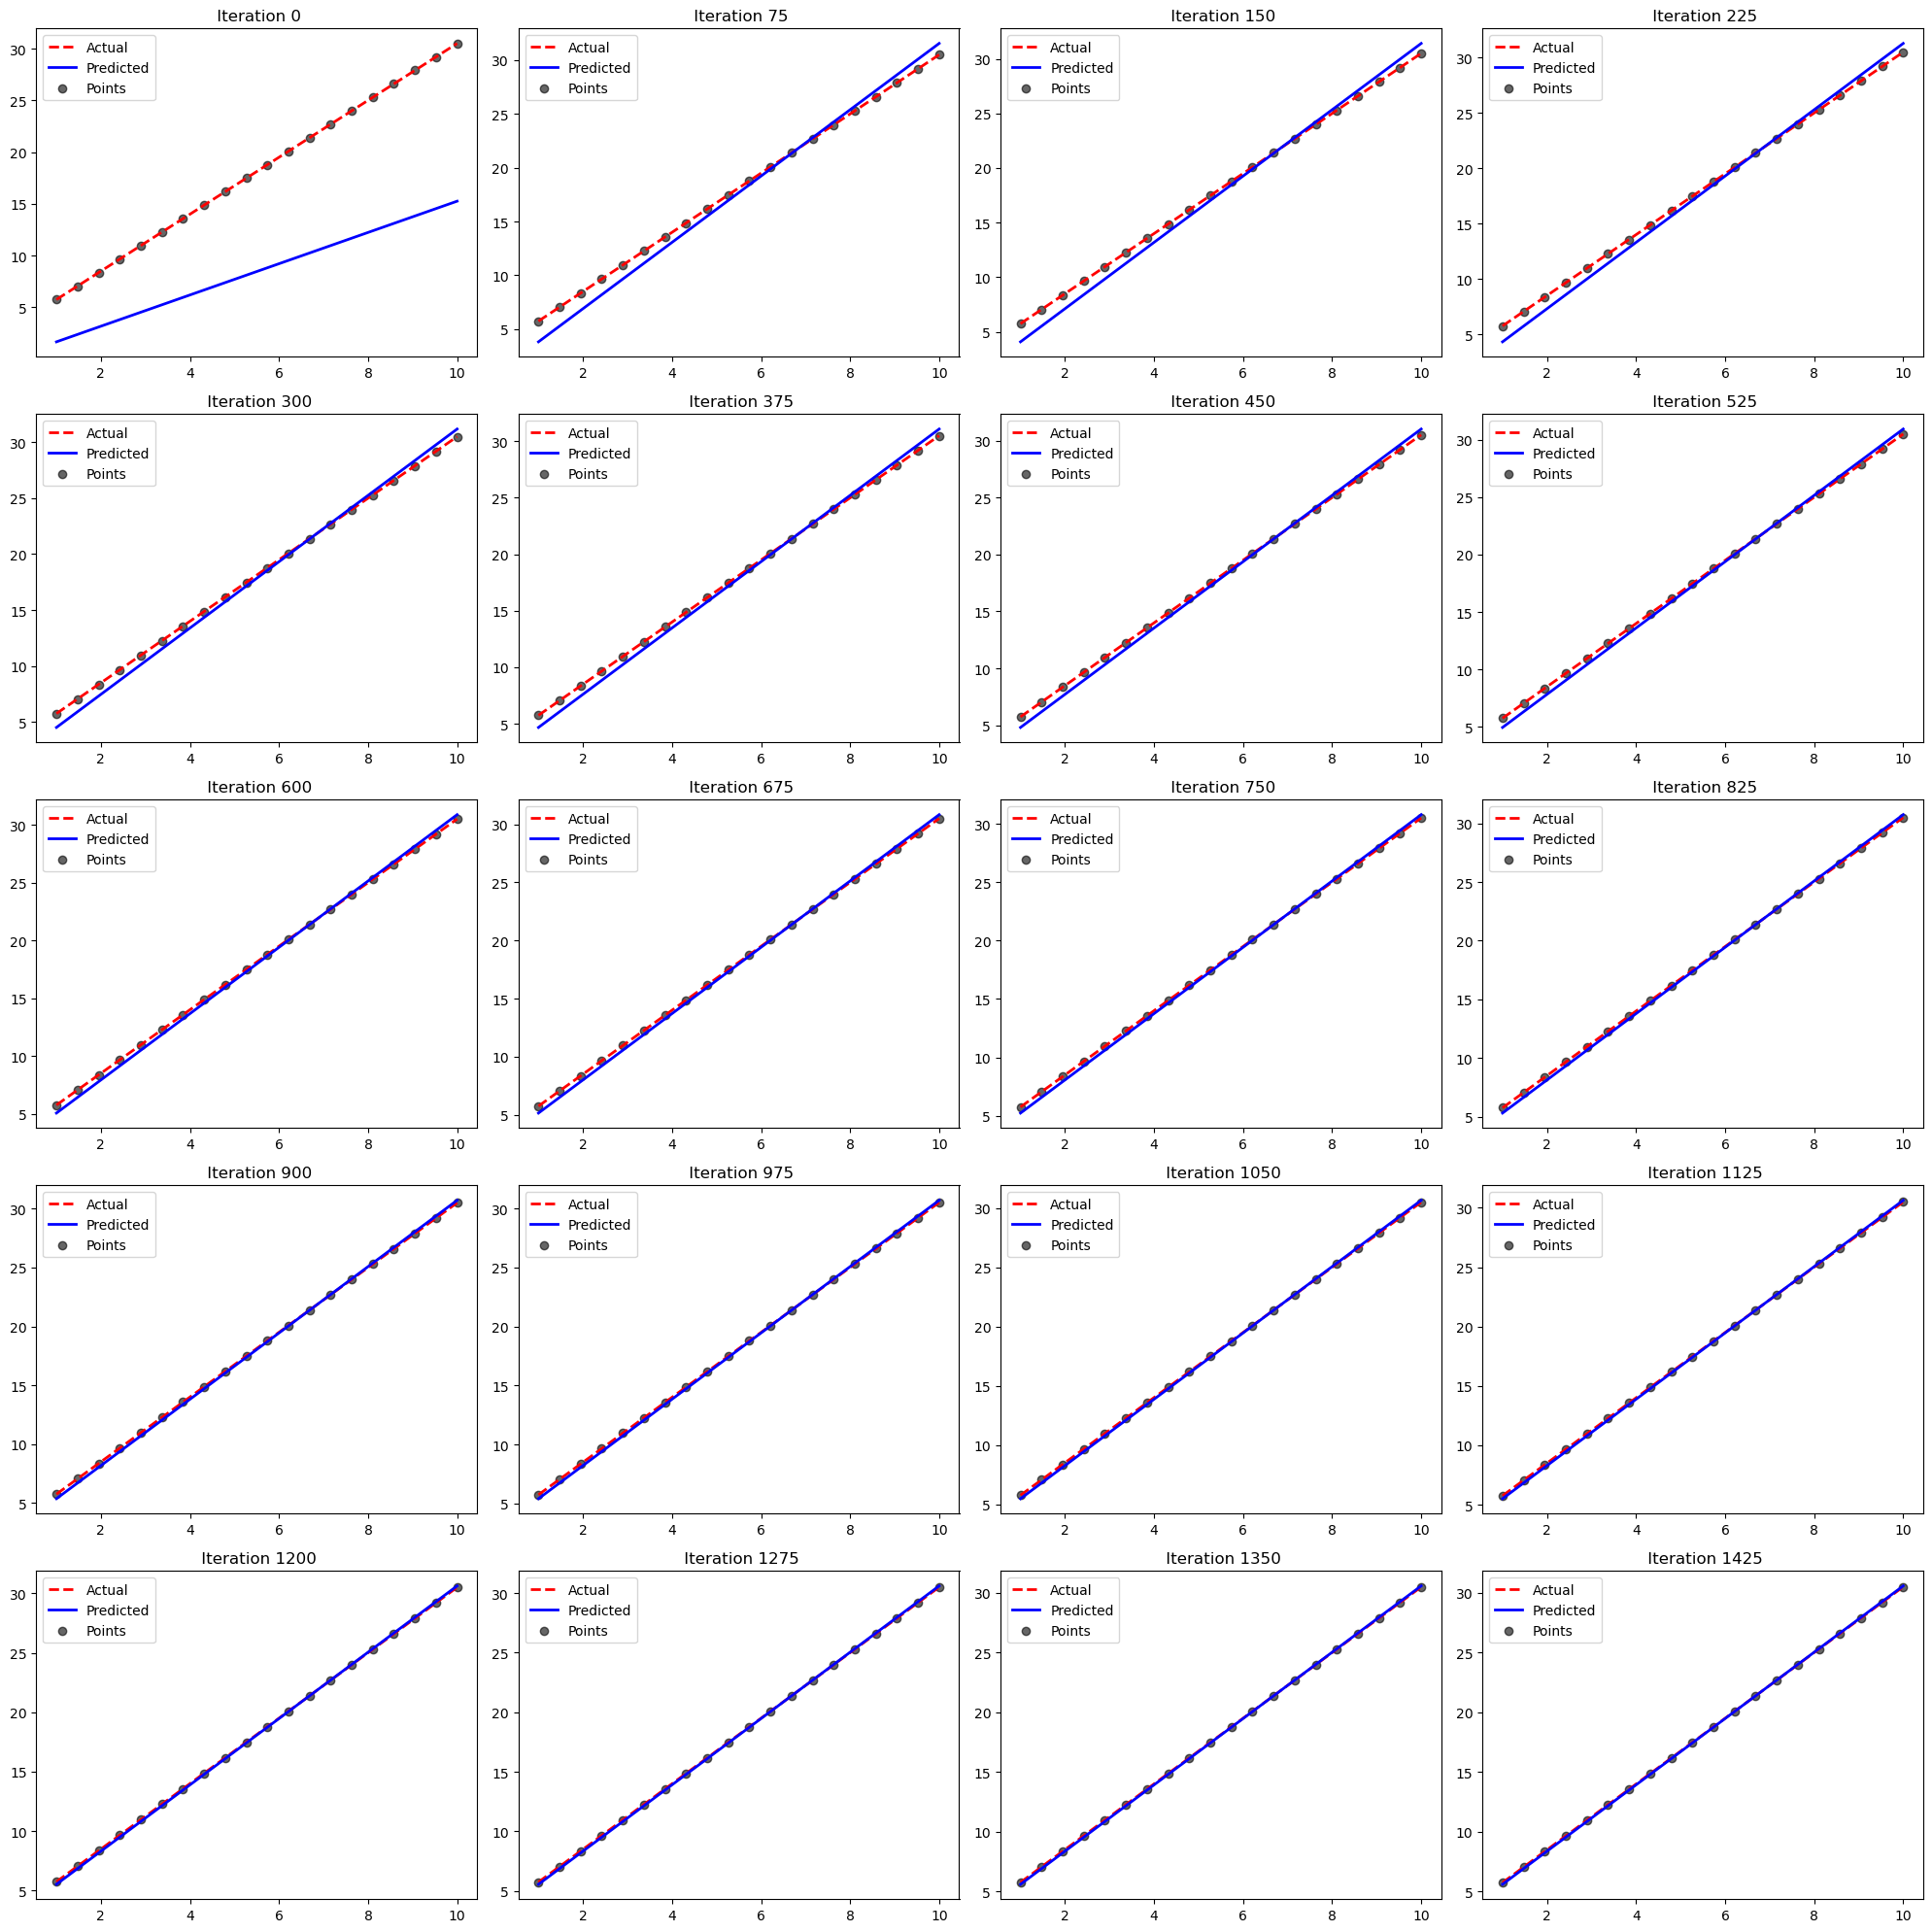

In [6]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(5,4,figsize=(20,20))
epoch=1500
save_interval = epoch // 20
for i in range(5*4):
    row=i//4
    col=i%4
    ax[row,col].plot(X,y,color="red",label="Actual",linewidth=2,linestyle="--")
    new_y=theta_list[i]*X+bias_list[i]
    ax[row,col].plot(X,new_y,color="blue",label="Predicted",linewidth=2)
    ax[row, col].scatter(X, y, color="black", label="Points", alpha=0.6)
    ax[row, col].set_title(f" Iteration {i*save_interval}")
    ax[row, col].legend()
plt.tight_layout()
plt.show()

Another example, where values range from 10-20, with `theta` equal to 5.3 and `b` equal to 4.6.

Here I required more iterations.

In [7]:
X,y=create_data(10,20,50,5.3,4.6)
theta,bias,_,_=run_model(X,y,0.001,epoch=200000)
print(theta,bias)

5.300168859106735 4.597369889910833


What happens if I increase the learning rate to 0.1?

**There is no convergence, and you end up with theta and bias values equal to null!**

The learning rate is an important hyperparameter to control.

In [8]:
X,y=create_data(10,20,50,5.3,4.6)
theta,bias,_,_=run_model(X,y,0.1,epoch=100000)
print(theta,bias)

nan nan


/tmp/ipykernel_930402/2827228886.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  theta=theta-alpha*dj_dtheta


Now that we know how to calculate gradients and update the weights, let's compare linear regression to a neural network.
The figure below illustrates the difference.

image source:https://media.geeksforgeeks.org/wp-content/uploads/20240614193911/Linear-Regression-vs-Neural-Networks.webp


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240614193911/Linear-Regression-vs-Neural-Networks.webp"></img>

- Linear Regression- <b>Equivalent</b> to a <b>single-layer</b> neural network. <b>No activation function</b> such as ReLu.
- Neural Network - Typically has <b>one or more hidden layers</b>. Can have <b>non-linear activations</b> such as ReLu or Sigmoid.
- Neural network is like <b>interconnected layers of linear regression</b>, where each layer's output is passed through an activation function.
- Linear Regression uses chain rule from calculus (as we did above), but no complex backpropogation algorithm.
    - Linear regression may have a close form solution given by $$\theta=(X^{T}X)^{-1}(X^Ty)$$
    - Backpropogation is the fundamental algorithm for training a neural network. It allows you to calculate how changes in any parameter affects the Loss. To do so, you need to apply the chain rule. The good thing is that with pyTorch, you don't need to do any of this.

# <a id="Layers-of-a-Neural-Network">Layers of a Neural Network</a>

In simple terms, here are the layers of a  neural network.

image source: https://www.researchgate.net/profile/Haohan-Wang-4/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.pngg


<img src="https://www.researchgate.net/profile/Haohan-Wang-4/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.pngg" width=500 height=250></img>

- The <b> Input layer </b>: This is where input data enters the neural network.  Each node is a feature in your dataset.
- The <b>hidden layer</b>. This layer performs computation on the input data. The values of a hidden layer are computed through:
    -   Matrix multiplication of inputs with learned weights.
    -   Addition of bias terms.
    -   Application of a non-linear function such as <b>ReLU</b>
    -  A neural network can have <b> multiple hidden layers.
    -  A <b>shallow neural network</b> has one or two hidden layers.
    -  A neural network with more than two hidden layers is considered <b>deep</b>, which is the origin of the term <b> deep learning</b>.
- The <b>Output Layer</b>.  This layer produces the final layer.
    -   It often uses an activation function such as <b>Sigmoid</b> (for binary classification) or <b>Softmax</b> (for multi-class classification).
    - Predictions are classified based on a probability threshold.
        - For example, if the output probability >0.5, the input is classified as <b> Class A</b>--otherwise it is classified as <b>Class B</b>

# Backpropagation

This is another fundamental concept in deep learning.
In linear regression, since you have just one layer, you calculate the gradient of the loss with respect to only the slope and the bias terms.
However, in a neural network, there are multiple layers, with each layer and each node associated with weights and bias terms.

<b>Backpropagation</b> is the algorithm used to compute the gradient of the loss with respect to all these weights and biases, across all layers.

<b>Gradient descent</b> can then be used to update the weights by taking into account the learning rate and gradient computations.

image source:https://editor.analyticsvidhya.com/uploads/18870backprop2.png

<img src="https://editor.analyticsvidhya.com/uploads/18870backprop2.png" width=800></img>

# <a id="Torch-Basics">Torch Basics</a>

There are 2 python libraries that are currently popular: <b> PyTorch</b> developed by <b> Meta</b>, and <b>Tensorflow</b> developed by <b>Google </b>. <br>

### Why Torch?

Tensorflow used to be highly popular, but in recent years, PyTorch has taken off.  Tensorflow is still popular in industry, but in research and academia, PyTorch is the most popular package currently available.
The primary advantage of PyTorch is ease of use, while Tensorflow is considered more complex.<br>
In fact, PyTorch seems quite similar to <b> Numpy </b>, a highly popular CPU-based numeric computing package.<br>
Google has also developed a library called <b> Jax</b>, which was built on top of python.

Growth comparison between Tensorflow and PyTorch:

image source: "https://cdn.prod.website-files.com/67a1e6de2f2eab2e125f8b9a/67be0ec7762fefb987e5ff56_Fraction-of-Papers-Using-PyTorch-vs.-TensorFlow.png

<img src="https://cdn.prod.website-files.com/67a1e6de2f2eab2e125f8b9a/67be0ec7762fefb987e5ff56_Fraction-of-Papers-Using-PyTorch-vs.-TensorFlow.png"></img>

## The Basics

Here is how we import the torch Package.  Let's also import numpy.
- torch: the core library for PyTorch. Provides GPU support.

- numpy: Library for numerical computing.  Not for Deep Learning.

Numpy can be useful for initial data handling.

In [9]:
import torch
import numpy as np

Here we define a nested list that represents a 2x2 matrix.  This is plain python.

I am using this to create simple mock data.

In [10]:
data=[[1.,2.],[3.,4.]]

Let's use the print statement to verify the structure of the list.

In [11]:
print(data)

[[1.0, 2.0], [3.0, 4.0]]


We inspect the data to verify that this is a standard python list.

In [12]:
print(type(data))

<class 'list'>


This converts a python list to a PyTorch tensor.  Tensors are the fundamental data structure in PyTorch.
Tensors are required inputs in all PyTorch operations (including define neural network, loss criteria, optimization, etc).
Tensors differ from NumPy in various ways:
- Can run on GPU
- Can perform automatic differentiation (i.e. AutoGrad)
- Built for Deep Learning

In [13]:
torch_data=torch.tensor(data)

Let's inspect the data.

In [14]:
torch_data

tensor([[1., 2.],
        [3., 4.]])

Check tensor type. This should confirm that the data is of tensor type.

In [15]:
type(torch_data)

torch.Tensor

Here, I am creating a numpy array using np.array.
It is used to convert to PyTorch Tensor by using <b>torch.from_numpy()</b>.
Use this when you need to covert from numpy to PyTorch tensor.

In [16]:
data_numpy=np.array([[1,2],[3,4]])
torch.from_numpy(data_numpy)

tensor([[1, 2],
        [3, 4]])

The <b> ones_like</b> method will create a matrix of ones with the same shape and type as original data.

In [17]:
torch.ones_like(torch_data)

tensor([[1., 1.],
        [1., 1.]])

<b>Manual_seed()</b> ensures reproducibility.
The <b> rand_like()</b> method generates random tensor with the same shape as input data.

In [18]:
torch.manual_seed(1)
torch.rand_like(torch_data)

tensor([[0.7576, 0.2793],
        [0.4031, 0.7347]])

<b>Create a random tensor with shape: </b> The <b> rand()</b> function creates a random matrix with a specific shape. Let's use a 3x3 shape.

In [19]:
shape=(3,3)
torch.rand(shape)

tensor([[0.0293, 0.7999, 0.3971],
        [0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826]])

The <b> ones() </b> and <b> zeros() </b>function create matrices of ones and zeros with specific shape.

In [20]:
print(torch.ones(shape))
torch.zeros(shape)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

##### Tensor Attributes
The <b> .shape </b> attribute can be used for finding dimensions of a matrix. <br>
<b> .dtype </b> tells you the data type (float?) <br>
The <b> .device </b> attribute tells you whether cpu or gpu is being used.

In [21]:
vals=torch.rand((3,4))
print(vals.shape)
print(vals.dtype)
print(vals.device)

torch.Size([3, 4])
torch.float32
cpu


<b> Check GPU </b>

Is a GPU device available?  Use torch.cuda.is_available()

In [22]:
torch.cuda.is_available()

/usr/local/apps/python/py3.11/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1724898583682/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


False

You can set the device name as follows. This little script checks to see if you have GPU available. If not, we use "CPU".

In [23]:
"cuda" if torch.cuda.is_available() else "cpu"

'cpu'

Here are 2 random matrices of shape 3x4.  For reproducibility we set a seed, so that the same random numbers are generated.

In [24]:
torch.manual_seed(1)
a=torch.rand(3,4)
b=torch.rand(3,4)

You can then concatenate these 2 matrices as follows.  First we concatenate by row:

In [25]:
torch.concat([a,b],dim=0)

tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.0293, 0.7999, 0.3971, 0.7544],
        [0.5695, 0.4388, 0.6387, 0.5247],
        [0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843]])

Let's retrieve the shape of the concatenated matrix to ensure that concatenation was succesful:

In [26]:
torch.concat([a,b],dim=0).shape

torch.Size([6, 4])

Instead of concatenating by row, we can also concatenate by column, by specifying dim to be equal to 1.

<b> Columns tend to be features while rows are observations </b>

In [27]:
torch.concat([a,b],dim=1)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.6826, 0.3051, 0.4635, 0.4550],
        [0.0293, 0.7999, 0.3971, 0.7544, 0.5725, 0.4980, 0.9371, 0.6556],
        [0.5695, 0.4388, 0.6387, 0.5247, 0.3138, 0.1980, 0.4162, 0.2843]])

Here is how to transpose a matrix.  Original matrix, which is a 3x4 matrix.

In [28]:
b

tensor([[0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843]])

Transposed.  This is instead 4x3.
Can be useful for matrix multiplication.

In [29]:
b.T

tensor([[0.6826, 0.5725, 0.3138],
        [0.3051, 0.4980, 0.1980],
        [0.4635, 0.9371, 0.4162],
        [0.4550, 0.6556, 0.2843]])

<img src="https://sprintchase.com/wp-content/uploads/2025/05/Transposing-a-tensor.jpg" width=500></img>

For tensors with more than 2 dimensions, such as 3d tensors used to represent images, PyTorch provides the <b>permute</b> method to reorder the axes or dimensions.

If the original shape is a x b x n

This format is common in TensorFlow and some other image processing libraries.

You can the use permute to reorder the dimensions as folows:

tensor.permute(2, 0, 1)

2 corresponds to n (last dimension or channels)
0 corresponds to a (dimension 0)
1 corresponds to b (dimenion 1)

Final shape: <b>n x a x b </b>


<b> 2 methods for matrix multiplication </b>


The column dimension of the first matrix should be the same as the row of the second matrix.
Hence why we transpose the second matrix.<br>
So we have (3x4) and (4,3) matrices.
<br>
This produces a <b> 3x3 </b> matrix.
Most regression models require matrix computations.  These 2 methods are therefore very helpful.

In [30]:
print(a@b.T)
a.matmul(b.T)

tensor([[1.1235, 1.4322, 0.6697],
        [0.7914, 1.2818, 0.5474],
        [1.0574, 1.4870, 0.6806]])


tensor([[1.1235, 1.4322, 0.6697],
        [0.7914, 1.2818, 0.5474],
        [1.0574, 1.4870, 0.6806]])

The operation below is an <b>elementwise multiplication</b>.

Value in row 1, column 1 of matrix 1 gets multiplied by value in row 1, column 1 of matrix 2

In [31]:
a*b

tensor([[0.5172, 0.0852, 0.1868, 0.3343],
        [0.0168, 0.3983, 0.3722, 0.4946],
        [0.1787, 0.0869, 0.2658, 0.1492]])

Let's verify Here, I am multiplying the value in row 0 and column 0 in matrix one by row 0 and column 0 in matrix 2.

In [32]:
a[0,0]*b[0,0]

tensor(0.5172)

You can also perform <b> inline </b> operation, which means that it directly modifies your variable. You don't need to create a new variable. <br>
Generally speaking, the equivalent inline operations tend to have a   <b>_ </b> in them.
Here is the matrix a.

In [33]:
a

tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.0293, 0.7999, 0.3971, 0.7544],
        [0.5695, 0.4388, 0.6387, 0.5247]])

What happens if you transpose it using the _() function?

In [34]:
a.t_()

tensor([[0.7576, 0.0293, 0.5695],
        [0.2793, 0.7999, 0.4388],
        [0.4031, 0.3971, 0.6387],
        [0.7347, 0.7544, 0.5247]])

Let's look at the original a. **Notice that a is now the transposed matrix and not equal to the original a.**

In [35]:
a

tensor([[0.7576, 0.0293, 0.5695],
        [0.2793, 0.7999, 0.4388],
        [0.4031, 0.3971, 0.6387],
        [0.7347, 0.7544, 0.5247]])

Notice that it got transposed and it is saved in the same variable.
<br>
<br>

Here is how to extract a number. We use the <b> item() </b> function.<br>
But before we do that, let's use sum() to see what the output looks like?  It is of tensor type:

In [36]:
a.sum()

tensor(6.3270)

Notice above that the returned value is a tensor.  If  you use .item(), it is just a number, and is of type float.

In [37]:
print(a.sum().item())

6.3269782066345215


In [38]:
print(type(a.sum()))
print(type(a.sum().item()))


<class 'torch.Tensor'>
<class 'float'>


Here I am copying a to b.  The dimensions need to match.
If you recall, here is what b looks like:

In [39]:
b

tensor([[0.6826, 0.3051, 0.4635, 0.4550],
        [0.5725, 0.4980, 0.9371, 0.6556],
        [0.3138, 0.1980, 0.4162, 0.2843]])

Here is what a looks like:

In [40]:
a

tensor([[0.7576, 0.0293, 0.5695],
        [0.2793, 0.7999, 0.4388],
        [0.4031, 0.3971, 0.6387],
        [0.7347, 0.7544, 0.5247]])

You need to ensure that the dimensions match.  Hence I transposed a to have the same dimension as b. We are doing inline as you can see from the "_".

In [41]:
b.copy_(a.T)

tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.0293, 0.7999, 0.3971, 0.7544],
        [0.5695, 0.4388, 0.6387, 0.5247]])

Original a

In [42]:
a

tensor([[0.7576, 0.0293, 0.5695],
        [0.2793, 0.7999, 0.4388],
        [0.4031, 0.3971, 0.6387],
        [0.7347, 0.7544, 0.5247]])

B copied from a transpose

In [43]:
b

tensor([[0.7576, 0.2793, 0.4031, 0.7347],
        [0.0293, 0.7999, 0.3971, 0.7544],
        [0.5695, 0.4388, 0.6387, 0.5247]])

Another example of inline operation.  Here I am adding  1.<br>
First, let's inspect `a` to see what it looks like.

In [44]:
a

tensor([[0.7576, 0.0293, 0.5695],
        [0.2793, 0.7999, 0.4388],
        [0.4031, 0.3971, 0.6387],
        [0.7347, 0.7544, 0.5247]])

Now let's perform the operation.

In [45]:
a.add_(1)

tensor([[1.7576, 1.0293, 1.5695],
        [1.2793, 1.7999, 1.4388],
        [1.4031, 1.3971, 1.6387],
        [1.7347, 1.7544, 1.5247]])

Notice that 1 is added to all matrices.

In [46]:
a

tensor([[1.7576, 1.0293, 1.5695],
        [1.2793, 1.7999, 1.4388],
        [1.4031, 1.3971, 1.6387],
        [1.7347, 1.7544, 1.5247]])

Modifying the original numpy will also modify the torch matrix that is derived from numpy.
Let's create a 3x4 numpy matrix of ones.

In [47]:
np_ones=np.ones((3,4))

Convert this matrix of ones to torch by using from_numpy()

In [48]:
torch_ones=torch.from_numpy(np_ones)
print(torch_ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


Add one to np_ones in place by using out=np_ones.

In [49]:
np.add(np_ones,1,out=np_ones)

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

Here is what the numpy_ones variable looks like:

In [50]:
np_ones

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

What about the torch_ones variable, which I have not touched at all?

In [51]:
torch_ones

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], dtype=torch.float64)

Notice that torch_ones is also transformed.

Torch has many operations.  The full documentation can be found below:

https://docs.pytorch.org/docs/stable/torch.html


# <a id="#Regression-Using-PyTorch">Regression Using PyTorch</a>

Now, back to training a regression. This time we will use pyTorch.
Let's start by creating some data.
The torch.linspace() method can be used to create data.  Here I want values from 1 to 10, with 20 total values.

In [52]:
def create_data_torch(start,stop,ct,m,b):
    X= torch.linspace(start,stop,ct)
    y=X*m+b
    return(X,y)

In [53]:
X_torch,y_torch=create_data_torch(1,10,20,2.75,3)
print(f"X:{X_torch},y:{y_torch}")

X:tensor([ 1.0000,  1.4737,  1.9474,  2.4211,  2.8947,  3.3684,  3.8421,  4.3158,
         4.7895,  5.2632,  5.7368,  6.2105,  6.6842,  7.1579,  7.6316,  8.1053,
         8.5789,  9.0526,  9.5263, 10.0000]),y:tensor([ 5.7500,  7.0526,  8.3553,  9.6579, 10.9605, 12.2632, 13.5658, 14.8684,
        16.1711, 17.4737, 18.7763, 20.0789, 21.3816, 22.6842, 23.9868, 25.2895,
        26.5921, 27.8947, 29.1974, 30.5000])


In [54]:
type(X_torch),type(y_torch)

(torch.Tensor, torch.Tensor)

Here is how to achieve the same result using pyTorch:
1) <b>Set the random seed</b> to make results reproducible.
2) <b>Specify the loss function</b> (e.g. MSE)
3) <b>Randomly initialize theta</b> and set bias to zero (or initialize both randomly)
4) <b> Set up your optimizer</b> and in this case stochastic gradient descent
5) <b> Zero the gradients </b> at each iteration so that the gradient does not accumulate from previous step.
6) <b>Calculate  your prediction</b> using current model parameters.
7) <b>Compute the loss </b> by comparing `y_hat` to the actual `y`.
8) <b>Perform backpropogation</b> by using `loss.backward()`. All gradients are calculated
9) <b>Update the model parameters </b> by calling optim.step().

Due to pyTorch's autograd system, you do not need to <b>compute derivatives</b> and update weights manually.  Let pyTorch handle it.

In [55]:
torch.manual_seed(1)
criterion=torch.nn.MSELoss()
theta_torch=torch.randn(1,requires_grad=True)
bias_torch=torch.zeros(1,requires_grad=True)
optim=torch.optim.SGD([theta_torch,bias_torch],lr=0.01)
loss_list=[]
for i in range(10000):
    optim.zero_grad()
    y_hat=X_torch*theta_torch+bias_torch
    loss=criterion(y_hat,y_torch)
    loss_list.append(loss.detach().numpy())
    loss.backward()
    optim.step()
print(theta_torch.item(),bias_torch.item())

2.750005006790161 2.999966621398926


Here is what the loss looks like going from 0 to 10000.  It drops rather sharply.
You want the loss to go down.  The closer it is to zero, the better.

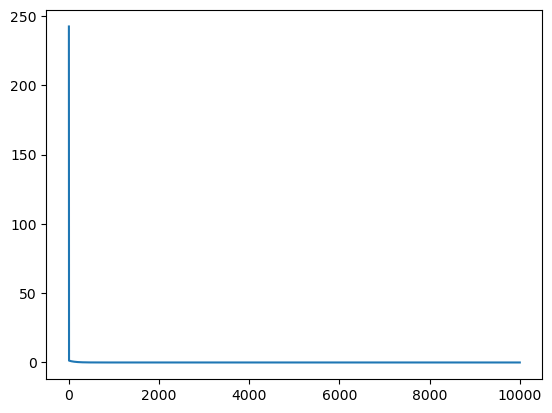

In [56]:
import matplotlib.pyplot as plt
fix,ax=plt.subplots()
ax.plot(list(range(10000)),loss_list[:10000])
plt.show()

<b> You can also use the nn.Module class to perform the same thing, using the nn.Linear() method.</b>

# <a id="Using-the-nn-class">Using the nn class</a>

In [57]:
import torch.nn as nn

Instead of manually computing predictions using mx+b, we can use PyTorch's nn.Module class to define a model.

Here, we define  our own class (Model_Class) that inherits from nn.Module.
Inside the  `__init__(self)` method, we use `super()__init()__` to initialize the parent class. In this case, we use a single nn.linear() method to define mx+b.
We define shapes within nn.Linear().  Here, for a simple linear regression, the input is 1 and output is also 1.

The forward method defines the forward pass. This is where you chain your layers.
The remaining steps are as above.

<b> Note that nn.Linear() requires a 2d tensor. We use view(-1,1) to reshape the tensor to 2D shape.

In [58]:
torch.manual_seed(1)
class Model_Class(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(1,1)
    def forward(self,x):
        x=self.linear(x)
        return x
model_class=Model_Class()
criterion=nn.MSELoss()
optim=torch.optim.SGD(model_class.parameters(),lr=0.01)
for epoch in range(2000):
    model_class.train()
    optim.zero_grad()
    output=model_class(X_torch.view(-1,1))
    loss=criterion(y_torch.view(-1,1),output)
    loss.backward()
    optim.step()

In [59]:
print(model_class.linear.weight)
print(model_class.linear.bias)

Parameter containing:
tensor([[2.7502]], requires_grad=True)
Parameter containing:
tensor([2.9987], requires_grad=True)


## <a id="Logistic-Regression">Logistic Regression</a>

Regression is used for predicting continuous outcome (e.g. height, housing price, etc).

For classification problems, where the goal is to predict discrete categories, one of the most common methods is logistic regression.  Despite its name, it is used for classification tasks, not regression.
<b>How it works: </b>

Similar to linear regression, you begin by calculating linear combination of input features
$$z=\theta^Tx+b$$

Where:
- theta is the weight
- x is the input features
- b is the bias term
- z is the resulting output


However, instead of using z directly, logistic regression passes it through a sigmoid function(x) to squash the output between 0 to 1:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$

These values can be interpreted as probabilities.

<b> Properties of a logistic regression </b>
- Approaches 0 and 1 but never reaches them
- The probability is for one class in a binary classification.
    - If $\sigma(z)>0.5$ then predict <b>Class 1</b>
    - Else predict <b>Class 0 </b>


Here is what a sigmoid function looks like:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" width=500></img>



The derivative of the sigmoid is given by:
$$\frac{d\sigma(z)}{dz}=\sigma(z) (1-\sigma(z)$$

This is <b>useful for backpropogation</b> in a neural network.


<b> Creating mock classification data</b>

We will use the `make_classification` method from `sklearn.datasets` to creata synthetic(mock) data.

We will also use `train_test_split` from `sklearn.model_selection` to divide data into training and test sets.

In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

<b> Generate synthetic data </b>
We generate 1,000 observations using <b>make_classification</b>, which creates labeled data (i.e. x and y).

20% will be reserved for testing using <b>train_test_split.</b>

Sklearn uses NumPy arrays by default.  We will convert to PyTorch tensors and ensure that they are float.  We need them to be columns.

In [61]:
X, y = make_classification(n_samples=1000,random_state=20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train=torch.from_numpy(X_train).float()
y_train=torch.from_numpy(y_train).view(-1,1).float()
X_test=torch.from_numpy(X_test).float()
y_test=torch.from_numpy(y_test).view(-1,1).float()

The shape should give us <b>800 observations</b> for the training set, and <b>200</b> for the testing set.

In [62]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

torch.Size([800, 20]) torch.Size([800, 1]) torch.Size([200, 20]) torch.Size([200, 1])


The following class defines a simple logistic regression model using `nn.Module`.
This is implemented as a single linear layer. The sigmoid is applied outside.

In [63]:
class Model_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(20,1)
    def forward(self,x):
        x=self.linear(x)
        return x

After defining the `Model_Logistic` class, the next step is to
1) Instantiate the model (i.e. create a new instance of the object). It expects 20 input features.
2) Specify a suitable loss function. The loss function we use also performs sigmoid computation.
3) Choose an optimizer to optimize model parameters during training.

In [64]:
model_logistic=Model_Logistic()
criterion_logistic=nn.BCEWithLogitsLoss()
optim_logistic=torch.optim.SGD(model_logistic.parameters(),lr=0.01)

<b>Fitting the Logistic Regression Model</b>

We will go through a loop. Here is what we do:

- Set a manual seed for reproducibility.
- Track training and test loss for visualization.
- Train the model for 20,000 iterations.
    - Clear accumulated gradient.
    - Compute models output.
    - Calculate the training loss.
    - Backpropagate to compute gradient.
    - Update model parameters.
- Evaluate on the test set
  - Calculate Test loss and classification accuracy.
- Print metrics every 1,000 iterations.

In [65]:
torch.manual_seed(1)
loss_train_list=[]
loss_test_list=[]
output_class=[]
for epoch in range(20000):
    model_logistic.train()
    optim_logistic.zero_grad()
    output=model_logistic(X_train)
    loss=criterion_logistic(output,y_train)
    loss.backward()
    optim_logistic.step()
    model_logistic.eval()
    output_test=model_logistic(X_test)
    loss_test=criterion_logistic(output_test,y_test)
    output_class=(output_test>0.5).int()
    accuracy=100*sum(y_test==output_class)/y_test.shape[0]
    if epoch%1000==0:
        loss_train_list.append(loss.detach().numpy())
        loss_test_list.append(loss_test.detach().numpy())
        print(f"Training Loss:{loss}, Test Loss:{loss_test},accuracy: {accuracy.item()} %")
output_class=output_class.detach().numpy()
print("Done!")

Training Loss:0.6450765132904053, Test Loss:0.6703838109970093,accuracy: 52.0 %
Training Loss:0.2389763593673706, Test Loss:0.29169762134552,accuracy: 89.5 %
Training Loss:0.19607990980148315, Test Loss:0.259053111076355,accuracy: 90.0 %
Training Loss:0.17783716320991516, Test Loss:0.24720092117786407,accuracy: 90.5 %
Training Loss:0.16736072301864624, Test Loss:0.24133792519569397,accuracy: 91.0 %
Training Loss:0.16045592725276947, Test Loss:0.23802970349788666,accuracy: 91.0 %
Training Loss:0.15552689135074615, Test Loss:0.2360430359840393,accuracy: 91.0 %
Training Loss:0.1518193483352661, Test Loss:0.23482374846935272,accuracy: 91.0 %
Training Loss:0.14892548322677612, Test Loss:0.23408523201942444,accuracy: 90.5 %
Training Loss:0.14660364389419556, Test Loss:0.2336643934249878,accuracy: 90.5 %
Training Loss:0.1447005718946457, Test Loss:0.2334616631269455,accuracy: 90.5 %
Training Loss:0.14311394095420837, Test Loss:0.23341278731822968,accuracy: 90.5 %
Training Loss:0.1417727023363

We visualize the loss.  We expect the loss to go down.  

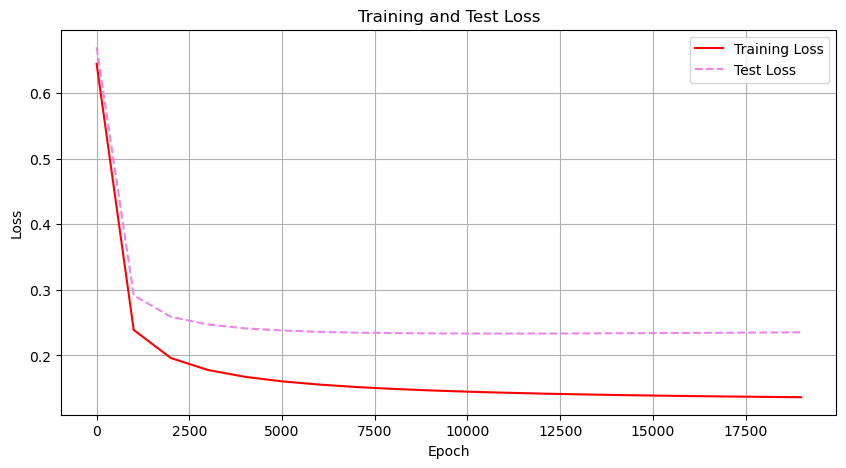

In [66]:
fix,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(list(range(0,20000,1000)),loss_train_list,color="red",label="Training Loss")
ax.plot(list(range(0,20000,1000)),loss_test_list,color="violet",label="Test Loss",linestyle="--")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training and Test Loss")
ax.legend()
ax.grid(True)
plt.show()

<b>Exercises </b>

Instead of the Loss, plot the accuracy.  
Instead of collecting training and test losses every 1000 iterations, try 500 iterations.

## <a id="Our-First-Neural-Network">Our First Neural Network</a>

The following class trains a  Neural Network using PyTorch's `nn.Module`. The model is designed for binary classification and consists of multiple layers:

<b> Model Architecture Overview </b>

- Input layer: Accepts 20 input features.
- Hidden Layer 1:
    - A linear layer to map from 20 to 15 features.
    -  A ReLU activation is applied to introduce non-linearity: $$ReLU(z)=max(0,z)$$
        -  Historically, sigmoid was the common activation function.  However, ReLU has been found to work better.  There is a problem called the vanishing gradient problem, which ReLU rectifies.
     - Here is what a ReLU Activation Function looks like:
  
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250129162127770664/Relu-activation-function.png" width=500></img>
          
-  Hidden Layer 2:
    -  Another Linear layer reducing from 15 to 10 input features.
    -  We again apply ReLU activation.
-  Output Layer:
    -  Maps from 10 to 1
    -  This is a single logit value, which passes through sigmoid via BCEWithLogitsLoss().

- The forward method defines the computation graph by chaining the layers that we defined.

<b>Training Setup</b>
- We instantiate the model.
- We next initialize our Loss (again Binary Cross Entropy)
- Specify the optimizer, which is Stochastic Gradient Descent with learning rate of 0.01.
- Run the model for 10000 iterations, which updates the parameters via BackPropagation.
- Training only on the training set.

In [67]:
torch.manual_seed(1)
class Model_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1=nn.Linear(20,15)
        self.Relu1=nn.ReLU()
        self.Linear2=nn.Linear(15,10)
        self.Relu2=nn.ReLU()
        self.Linear3=nn.Linear(10,1)
    def forward(self,x):
        x=self.Linear1(x)
        x=self.Relu1(x)
        x=self.Linear2(x)
        x=self.Relu2(x)
        x=self.Linear3(x)
        return x
model_NN=Model_NN()
criterion_NN=nn.BCEWithLogitsLoss()
optim_nn=torch.optim.SGD(model_NN.parameters(),lr=0.01)
for epoch in range(10000):
    model_NN.train()
    optim_nn.zero_grad()
    output=model_NN(X_train)
    loss=criterion_NN(output,y_train)
    loss.backward()
    optim_nn.step()
    if epoch%1000==0:
        print(f"Loss:{loss.item()}")
print("Done Fitting the model")

Loss:0.6979708671569824
Loss:0.49003052711486816
Loss:0.15423551201820374
Loss:0.1061331108212471
Loss:0.08996479213237762
Loss:0.07927925139665604
Loss:0.07120523601770401
Loss:0.06438899785280228
Loss:0.058729786425828934
Loss:0.053950194269418716
Done Fitting the model


Instead of defining a custom module class by subclassing `nn.module`, we can also reconstruct the architecture by using `nn.Sequential`.
This approach is especially useful for simple feedforward networks.
The model architecture remains the same.

In [68]:
torch.manual_seed(1)
model_NN2=nn.Sequential(nn.Linear(20,15),nn.ReLU(),
                                  nn.Linear(15,10),
                                  nn.ReLU(),
                                  nn.Linear(10,1))
criterion_NN2=nn.BCEWithLogitsLoss()
optim_nn2=torch.optim.SGD(model_NN2.parameters(),lr=0.01)
for epoch in range(10000):
    model_NN2.train()
    optim_nn2.zero_grad()
    output=model_NN2(X_train)
    loss=criterion_NN2(output,y_train)
    loss.backward()
    optim_nn2.step()
    if epoch%1000==0:
        print(f"Loss:{loss.item()}")
print("Done Fitting the model")

Loss:0.6979708671569824
Loss:0.49003052711486816
Loss:0.15423551201820374
Loss:0.1061331108212471
Loss:0.08996479213237762
Loss:0.07927925139665604
Loss:0.07120523601770401
Loss:0.06438899785280228
Loss:0.058729786425828934
Loss:0.053950194269418716
Done Fitting the model


<b>Exercises:

- Add X_test prediction to the script above.  Plot the Loss.
- Does adding layers to the neural network improve the prediction or make it worse?
    - Try adding more layers
    - Try removing layers.
    - Is logistic regression better here?

- Calculate Accuracy and plot it.
- Try changing the loss from BCEWithLogitsLoss() to BCELoss(). What other changes do you need to make?
- We defined a training set and a test set.  However, it is also common to add a validation set.  Instead of spliting into 2, split it into 3.
- Play with the learning rate.
- Try other optimizers (Adam as opposed to SGD)

# <a id="Exploratory-Analysis-of-our-dataset">Exploratory Analysis of our dataset</a>

- The 5x5AD mice is a well-established transgenic model of Alzheimer's disease.
- It over expresses human APP (amyloyd beta precursor) and PS1 genes, each with various mutations.
- These mice rapidly develop hallmark features of the disease, including amyloid beta (A$\beta$) plaque deposition.
- These mice are supposed to rapidly develop features of Alzheimer's pathology.  Thus it is a model for Early Onset Alzheimer's Disease.


### Sample Information

Let's begin by importing the necessary libraries.  We will load:
- pandas (Used for analyzing tabulated data)
- matplotlib (For generating figures)
- Seaborn (For generating figures, and uses matplotlib as the backbone)
- re (Regular expression parsing)
- numpy (Numerical computing library)
- os (For looking at files, paths, etc)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import numpy as np
import os
print(f"Python Version:{sys.version}")
print(f"Numpy Version:{np.__version__}")
print(f"Seaborn Version:{sns.__version__}")
print(f"Pandas Version:{pd.__version__}")

Python Version:3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:17:24) [GCC 13.3.0]
Numpy Version:1.26.4
Seaborn Version:0.13.2
Pandas Version:2.2.3


We have an excel sheet containing information about the mice.

To load this dataset, we will use the pandas library.Since the file is in Excel format, we'll use the read_excel function.

In [70]:
df=pd.read_excel("/data/banskotan2/Projects/Deep_Learning/5XFAD/mice_5XFAD.xlsx")

/usr/local/apps/python/py3.11/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


Change to the appropriate directory.

In [71]:
os.chdir("/data/banskotan2/Projects/Deep_Learning")

The original image data are provided in <b>SVS</b> format, which are high resolution pathological images. It is suitable for detailed image analysis. <br>

To begin, we iterate through these files by using list comprehension.  The SVS files are found under the FXFAD folder.  

In [72]:
file_names=[j for j in os.listdir("5XFAD/SVS_original") if "svs" in j]

We next take a quick peak at the files by creating a python slice.

In [73]:
file_names[:3]

['64911pi2.2-100224-1-29966-br-abeta.svs',
 '64911pi2.2-100224-10-30031-br-abeta.svs',
 '64911pi2.2-100224-11-30037-br-abeta.svs']

How big are these files?  We will use os.path.getsize() to find their file size.  

In [74]:
print("Size(in MB)")
[int(os.path.getsize("/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original"+"/"+file_names[j]))/1000000 for j in range(len(file_names))][:3]

Size(in MB)


[417.578235, 456.348347, 466.217987]

These files are quite big, making them very difficult to work with. <br>

In [75]:
full_path=["/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original"+"/"+j for j in os.listdir("5XFAD/SVS_original") if "svs" in j]

In [76]:
len(full_path)

27

In [77]:
full_path[:2]

['/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original/64911pi2.2-100224-1-29966-br-abeta.svs',
 '/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original/64911pi2.2-100224-10-30031-br-abeta.svs']

Due to the large size of the SVS files, we we downsample them for making processing more efficient.
SVS files use a <b> pyramid structure </b>, which means they contain multiple image resolutions within a single file. This is ideal for zooming in.

To simplify processing, I used imagemagick, I converted the SVS files to PNG files.  The command server as an example:<br>

<b><i>magick a.svs[2] -resize 60% -quality 70 a.png</i></b>

This command extracts lower resolution and resizes the image to 60% of its original dimension.

Regular expression converts svs to png.  

In [78]:
png_files=[re.sub("svs","png",j) for j in full_path]

In [79]:
png_files[0]

'/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original/64911pi2.2-100224-1-29966-br-abeta.png'

How many files?

In [80]:
len(png_files)

27

Let's look at what the file size after conversion:

In [81]:
os.path.getsize(png_files[0])/1000000

30.593742

It is 30 MB. This is still quite large, but we can at least load these images.

From the png files, let's extract the IDS.  We need to match it with the metadata.

In [82]:
file_ids=[int(re.sub(".*224\\-\\d+\\-(\\d+)\\-.*","\\1",png_files[i])) for i in range(len(png_files))]

In [83]:
file_ids[:10]

[29966, 30031, 30037, 30038, 30039, 30040, 30041, 30042, 30098, 30100]

Convert it to pandas dataframe using a Dictionary:

In [84]:
png_df=pd.DataFrame({"Tag":file_ids,"filename":png_files})

The Pandas dataframe has 2 columns: Filename and Tag.  Tag is the ID.

In [85]:
png_df.head()

,Tag,filename
0,29966,/data/banskotan2/Projects/Deep_Learning/5XFAD/...
1,30031,/data/banskotan2/Projects/Deep_Learning/5XFAD/...
2,30037,/data/banskotan2/Projects/Deep_Learning/5XFAD/...
3,30038,/data/banskotan2/Projects/Deep_Learning/5XFAD/...
4,30039,/data/banskotan2/Projects/Deep_Learning/5XFAD/...


Let's look at file name and ID

Where are these IDs found in our metadata.  It is actually in the Tag column.

In [86]:
df.head()

,Notes,ID,Tag,Sex,Strain,Born,ASP,Location,Sire,Dam,...,Gtype.3,LastAccess,ModifiedBy,AgeMo,AgeW,cagesize,Cage,DVC cage code,Plans,Behavior testing code
0,NaN,925248,GW 29966,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-07,save for deb,A1
1,NaN,925249,GW 29967,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-08,save for deb,A2
2,Needed second ear punch 9/3,925250,GW 29968,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-09,save for deb,A3
3,NaN,948356,GW 30118,F,5XFAD,2024-07-07,475-CMS-2026,BRC-02C705-705-15a-MC-66,GW 29979,GW 30009,...,NaN,2024-07-31 11:04:00,csmith,3.059211,13.285714,NaN,NaN,CROTEAU-05,save for deb,B2
4,miniMUGA panel … possible duplication of trans...,925760,GW 29982,F,5XFAD,2024-01-06,475-CMS-2026,BRC-02C705-705-15a-MC-47,GW29511,GW 29685,...,NaN,2024-01-30 13:45:00,egdouglass,9.078947,39.428571,NaN,47.0,CROTEAU-11,save for deb,D2


From the df "Tag" column, remove "GW" and convert to int using regular expression.

In [87]:
df

,Notes,ID,Tag,Sex,Strain,Born,ASP,Location,Sire,Dam,...,Gtype.3,LastAccess,ModifiedBy,AgeMo,AgeW,cagesize,Cage,DVC cage code,Plans,Behavior testing code
0,NaN,925248,GW 29966,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-07,save for deb,A1
1,NaN,925249,GW 29967,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-08,save for deb,A2
2,Needed second ear punch 9/3,925250,GW 29968,F,5XFAD,2023-12-30,475-CMS-2026,BRC-02C705-705-15a-MC-2,GW 29515,GW 29680,...,NaN,2024-01-23 10:58:00,egdouglass,9.309211,40.428571,NaN,2.0,CROTEAU-09,save for deb,A3
3,NaN,948356,GW 30118,F,5XFAD,2024-07-07,475-CMS-2026,BRC-02C705-705-15a-MC-66,GW 29979,GW 30009,...,NaN,2024-07-31 11:04:00,csmith,3.059211,13.285714,NaN,NaN,CROTEAU-05,save for deb,B2
4,miniMUGA panel … possible duplication of trans...,925760,GW 29982,F,5XFAD,2024-01-06,475-CMS-2026,BRC-02C705-705-15a-MC-47,GW29511,GW 29685,...,NaN,2024-01-30 13:45:00,egdouglass,9.078947,39.428571,NaN,47.0,CROTEAU-11,save for deb,D2
5,NaN,933588,GW 30037,F,5XFAD,2024-03-27,475-CMS-2026,BRC-02C705-705-15a-MC-34,GW 29969,GW 30008,...,NaN,2024-04-19 13:46:00,csmith,6.414474,27.857143,NaN,NaN,CROTEAU-14,save for deb,E1
6,NaN,933590,GW 30039,F,5XFAD,2024-03-27,475-CMS-2026,BRC-02C705-705-15a-MC-34,GW 29969,GW 30008,...,NaN,2024-04-19 13:46:00,csmith,6.414474,27.857143,NaN,NaN,CROTEAU-16,save for deb,E3
7,NaN,933591,GW 30040,F,5XFAD,2024-03-27,475-CMS-2026,BRC-02C705-705-15a-MC-34,GW 29969,GW 30008,...,NaN,2024-04-19 13:46:00,csmith,6.414474,27.857143,NaN,NaN,CROTEAU-17,save for deb,E4
8,NaN,946138,GW 30104,F,5XFAD,2024-06-25,475-CMS-2026,BRC-02C705-705-15a-MC-5,GW 29987,GW 30012,...,NaN,2024-07-15 10:39:00,csmith,3.453947,15.000000,NaN,NaN,CROTEAU-18,save for deb,F1
9,NaN,946140,GW 30106,F,5XFAD,2024-06-25,475-CMS-2026,BRC-02C705-705-15a-MC-5,GW 29987,GW 30012,...,NaN,2024-07-15 10:39:00,csmith,3.453947,15.000000,NaN,NaN,CROTEAU-20,save for deb,F3


In [88]:
df["Tag"]=df.Tag.str.replace("GW","").astype(int)

In [89]:
df["Tag"][0]

29966

These tags are the IDs. As an example, png_df in location 0 has the same ID.

In [90]:
png_df["Tag"][0]

29966

Let's compare the metadata to our images. Any files missing, or any images?

In [91]:
df_tag=df.Tag.tolist()
png_tag=png_df.Tag.tolist()
print(df.shape)
print(len(png_tag))

(25, 31)
27


As can be seen, we have 27 images, but the dataframe has just 25.  When we merge the 2 files together, the 2 discrepancies should be removed.
We will merge based on the "Tag" name.

In [92]:
final_df=pd.merge(df,png_df,on="Tag",how="left")

In [93]:
final_df.shape

(25, 32)

We now have 25 columns.

The Gtype.1 column is important.  This is where it has information on plaque or no plaque. I know that it is in column 17.

In [94]:
final_df.columns[17]

'Gtype.1'

Let's look at all the column names.

In [95]:
final_df.columns

Index(['Notes', 'ID', 'Tag', 'Sex', 'Strain', 'Born', 'ASP', 'Location',
       'Sire', 'Dam', 'Vendor', 'PlateCount', 'MostRecentPlate',
       'GeneTranslation', 'Gene1', 'Gtype', 'Gene2', 'Gtype.1', 'Gene3',
       'Gtype.2', 'Gene4', 'Gtype.3', 'LastAccess', 'ModifiedBy', 'AgeMo',
       'AgeW', 'cagesize', 'Cage', 'DVC cage code', 'Plans',
       'Behavior testing code', 'filename'],
      dtype='object')

<b>Distribution of Gender.</b>

In [96]:
final_df.Sex.value_counts().reset_index()

,Sex,count
0,F,25


These are all females. <br>
Now let's look at the <b> Genotype Column </b>

In [97]:
final_df["Gtype.1"].value_counts().reset_index()

,Gtype.1,count
0,+,13
1,-,12


13 are AD and 12 are Control.

Visualizing using Seaborn.

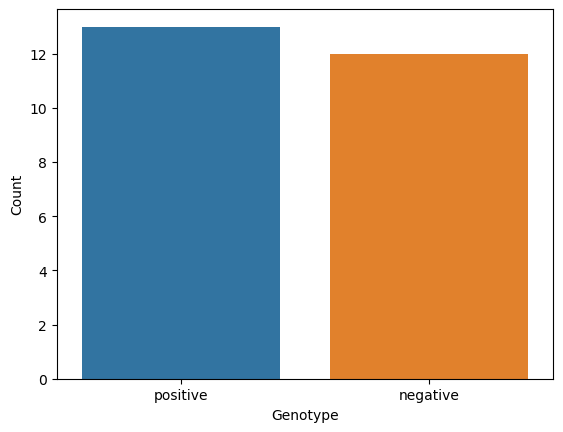

In [98]:
genotype_count=final_df["Gtype.1"].value_counts().reset_index()
ax=sns.barplot(genotype_count,x="Gtype.1",y="count",hue="Gtype.1")
ax.set_xlabel("Genotype")
ax.set_ylabel("Count")
ax.set_xticks(["+","-"])
ax.set_xticklabels(["positive","negative"])
plt.show()

What about age?
We will use the "Weeks" column.  Let's just look at all rows, since we have only 25 samples.

In [99]:
final_df["AgeW"]

0     40.428571
1     40.428571
2     40.428571
3     13.285714
4     39.428571
5     27.857143
6     27.857143
7     27.857143
8     15.000000
9     15.000000
10    15.000000
11    14.571429
12    28.000000
13    13.285714
14    13.285714
15    28.428571
16    28.428571
17    39.428571
18    39.428571
19    39.428571
20    27.857143
21    15.000000
22    14.571429
23    28.000000
24    40.000000
Name: AgeW, dtype: float64

<b>Youngest Age:</b>

In [100]:
final_df["AgeW"].min()

13.285714285714286

<b> Oldest Age: </b>

In [101]:
final_df["AgeW"].max()

40.42857142857143

<b> Histogram of the Age </b>

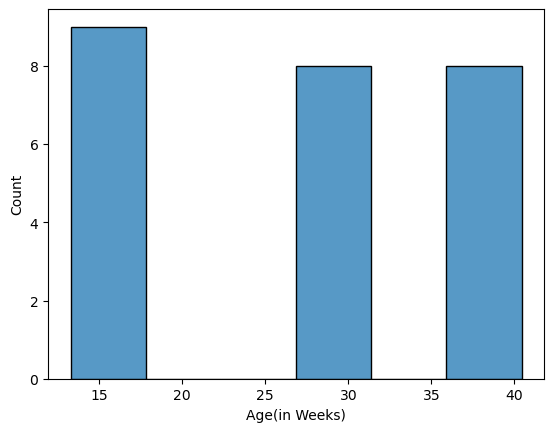

In [102]:
#df["AgeW"].plot.hist(bins=10)
ax=sns.histplot(final_df,x="AgeW")
ax.set_xlabel("Age(in Weeks)")
plt.show()

<b>Boxplot, where x is the Genotype, and y is the Age.</b>

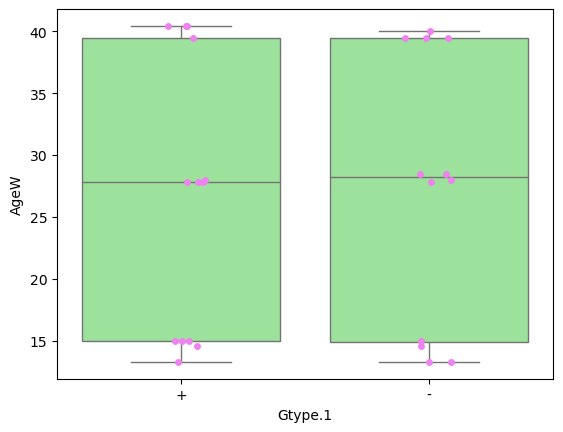

In [103]:
sns.boxplot(final_df,x="Gtype.1",y="AgeW",color="lightgreen")
sns.stripplot(final_df,x="Gtype.1",y="AgeW",color="violet")
ax.set_ylabel("Age(in Weeks")
plt.show()

Both plots show that there are 3 "clusters" of Age albeit slightly different in terms of Age. <br>
We will incorporate these categories to our dataframe.
If AgeW>30, we will call it B.
If Age<20, we call it C.
In between is B.

In [104]:
final_df["AgeCateg"]="B"
final_df.loc[final_df["AgeW"]>30,"AgeCateg"]="A"
final_df.loc[final_df["AgeW"]<20,"AgeCateg"]="C"

In [105]:
final_df[["Gtype.1","AgeCateg"]].value_counts()

Gtype.1  AgeCateg
+        C           5
         A           4
         B           4
-        A           4
         B           4
         C           4
Name: count, dtype: int64

### Image Exploration

Let's look at the images.  We have save it to final_df. Let's peak at one file.

In [106]:
final_df.filename.iloc[0]

'/data/banskotan2/Projects/Deep_Learning/5XFAD/SVS_original/64911pi2.2-100224-1-29966-br-abeta.png'

In [107]:
len(final_df.columns)

33

In [108]:
final_df.columns

Index(['Notes', 'ID', 'Tag', 'Sex', 'Strain', 'Born', 'ASP', 'Location',
       'Sire', 'Dam', 'Vendor', 'PlateCount', 'MostRecentPlate',
       'GeneTranslation', 'Gene1', 'Gtype', 'Gene2', 'Gtype.1', 'Gene3',
       'Gtype.2', 'Gene4', 'Gtype.3', 'LastAccess', 'ModifiedBy', 'AgeMo',
       'AgeW', 'cagesize', 'Cage', 'DVC cage code', 'Plans',
       'Behavior testing code', 'filename', 'AgeCateg'],
      dtype='object')

In [109]:
final_df=final_df.sort_values(by=["Gtype.1","AgeCateg"],ascending=[True,True])

We are going to use matplotlib to iterate through these 25 images.  
We will create 25 total subplots (5 rows x 5 columns).  <br>
We will first fill each subplot by column.

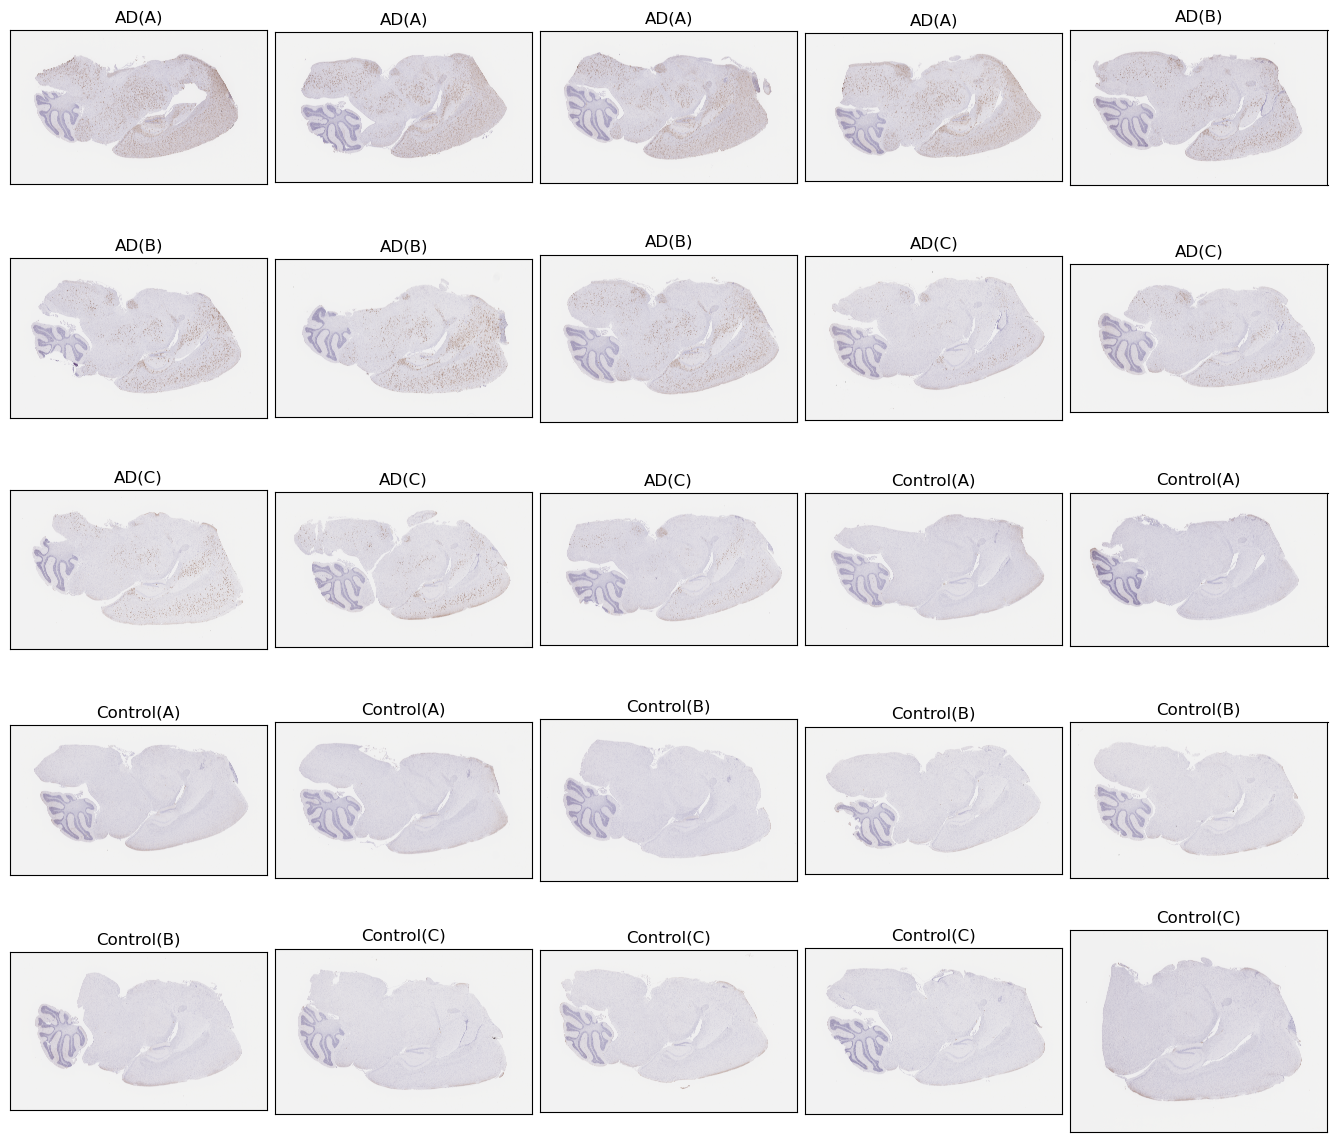

In [110]:
from PIL import Image
fig,ax=plt.subplots(5,5,figsize=(17,15))

for i in range(final_df.shape[0]):
    a=i//5
    b=i%5
    image=np.asarray(Image.open(final_df.iloc[i,31]))
    ax[a,b].imshow(image)
    plaque="Control"
    if final_df.iloc[i,17]=="+":
        plaque="AD"
    age_categ=final_df.iloc[i,32]
    ax[a,b].set_title(plaque+"("+age_categ+")")
    ax[a,b].set_xticks([])
    ax[a,b].set_xticklabels([])
    ax[a,b].set_yticks([])
    ax[a,b].set_yticklabels([])
plt.subplots_adjust(wspace=0.03, hspace=0.0001)
plt.show()

In [111]:
fig.savefig("Plaque_image.pdf")

In [112]:
final_df.to_csv("image_info.csv")